# Лабораторная работа №2

## Содержание:

Цель выполнения лабораторной работы

Описание входных данных

Описание алгоритмов классификации

Описание и интерпретация результатов работы алгоритмов

Выводы

## Цель выполнения лабораторной работы

1 Ознакомиться с теоретическим материалом, представленным на лекции, а также
с примером (https://mlbootcamp.ru/article/tutorial/).

2 Подготовить исходные данные для бинарной классификации (https://www.kaggle.com/datasets). Количество объектов в исходных данных должно быть не менее 1000, количество признаков – 5 и более (как категориальные (бинарные, небинарные), так и количественные признаки должны присутствовать). По аналогии с примером (https://mlbootcamp.ru/article/tutorial/) провести предобработку данных, при необходимости заполнить пропущенные данные, поменять тип данных, провести нормализацию данных, преобразовать признаки, проверить являются ли данные сбалансированными.

3 Провести классификацию различными способами (3 алгоритма), оценить
качество классификации с помощью метрик из приложения 1

4 Проанализировать результаты (оценить качество классификации) в случае
сэмплирования данных (например, с помощью алгоритмов Random Undersampling,
Random Oversampling, Smote), сравнить с результатами до сэмплирования.

5 Оформить отчет по лабораторной работе.

## Описание входных данных

Входные данные представляют собой информацию о пациентах, которые (не) болеют раком кожи. Датасет содержит в себе 319795 карточек пациентов

## Описание алгоритмов классификации

1 Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости. В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

2 Random forest (с англ. — «случайный лес») — алгоритм машинного обучения, предложенный Лео Брейманом[1][2] и Адель Катлер  (англ.)рус., заключающийся в использовании комитета (ансамбля) решающих деревьев. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана, и метод случайных подпространств  (англ.)рус., предложенный Тин Кам Хо  (англ.)рус.. Алгоритм применяется для задач классификации, регрессии и кластеризации. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим.

3 Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [49]:
df = pd.read_csv('heart_2020_cleaned.csv', sep=',')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Анализ данных

### Целевая переменная

In [5]:
df["SkinCancer"].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

Видим, что данные не сбалансированы

### BMI	

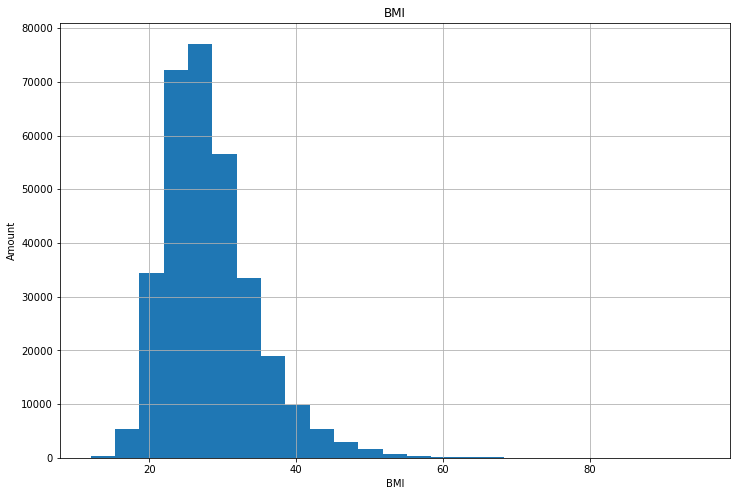

In [6]:
plt.figure(figsize = (12, 8))

df['BMI'].hist(bins=25)
plt.ylabel('Amount')
plt.xlabel('BMI')

plt.title('BMI')
plt.show()

Индекс массы > 60 какой-то нереалистичный

In [7]:
df = df.loc[df['BMI'] < 60]

### Smoking

In [8]:
df["Smoking"].value_counts()

No     187596
Yes    131707
Name: Smoking, dtype: int64

Выглядит адекватно

### AlcoholDrinking	

In [9]:
df["AlcoholDrinking"].value_counts()

No     297557
Yes     21746
Name: AlcoholDrinking, dtype: int64

Данные тоже не сбалансированы, не уверен, что люди отвечали правду

### Stroke

In [10]:
df["Stroke"].value_counts()

No     307261
Yes     12042
Name: Stroke, dtype: int64

### PhysicalHealth

In [11]:
df["PhysicalHealth"].value_counts(), df['MentalHealth'].value_counts()

(0.0     226372
 30.0     19402
 2.0      14860
 1.0      10479
 3.0       8600
 5.0       7585
 10.0      5443
 15.0      4991
 7.0       4616
 4.0       4456
 20.0      3200
 14.0      2888
 6.0       1269
 25.0      1157
 8.0        924
 21.0       622
 12.0       602
 28.0       443
 29.0       203
 9.0        179
 18.0       167
 16.0       135
 27.0       124
 17.0       110
 13.0        90
 22.0        88
 11.0        85
 24.0        66
 26.0        66
 23.0        46
 19.0        35
 Name: PhysicalHealth, dtype: int64,
 0.0     205165
 30.0     17294
 2.0      16469
 5.0      14127
 10.0     10491
 3.0      10449
 15.0      9872
 1.0       9278
 7.0       5524
 20.0      5417
 4.0       5371
 14.0      2042
 25.0      1952
 6.0       1505
 8.0       1090
 12.0       755
 28.0       514
 21.0       351
 29.0       315
 18.0       210
 9.0        202
 16.0       152
 17.0       128
 27.0       125
 13.0       110
 22.0        98
 11.0        82
 23.0        68
 24.0        67
 26

PhysicalHealth == 0?

## Обработка данных 

In [12]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Замена категориальных на вещественные

In [51]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [52]:
data_describe = df.describe(include=[object])

In [53]:
binary_columns = [c for c in categorical_columns if df.describe(include=[object])[c]['unique'] == 2]

In [54]:
binary_columns    = [c for c in categorical_columns if df.describe(include=[object])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if df.describe(include=[object])[c]['unique'] > 2]

In [55]:
for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = df[c] == top
    df.loc[top_items, c] = 0
    df.loc[np.logical_not(top_items), c] = 1

In [56]:
binary_to_numbers  = {'Yes': 1, 'No': 0}
df['HeartDisease'] = df['HeartDisease'].replace(binary_to_numbers)

In [20]:
binary_columns

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [57]:
for i in binary_columns:
    df[i] = df[i].astype(int)

In [58]:
data_nonbinary = pd.get_dummies(df[nonbinary_columns])
data_nonbinary.columns

Index(['AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [59]:
df = pd.concat((df[numerical_columns], df[binary_columns], pd.get_dummies(df[nonbinary_columns])), axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   SleepTime                            319795 non-null  float64
 4   HeartDisease                         319795 non-null  int32  
 5   Smoking                              319795 non-null  int32  
 6   AlcoholDrinking                      319795 non-null  int32  
 7   Stroke                               319795 non-null  int32  
 8   DiffWalking                          319795 non-null  int32  
 9   Sex                                  319795 non-null  int32  
 10  PhysicalActivity                     319795 non-null  int32  
 11  Asthma       

## Разбиение данных на train и test

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score

In [63]:
X = df.drop(columns = 'SkinCancer')
y = df['SkinCancer']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [68]:
y_train.value_counts()

0    194295
1     19967
Name: SkinCancer, dtype: int64

## Построение модели

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import ensemble

In [70]:
import sklearn.metrics

### Наивные Байес без Семплирования

In [72]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [73]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_test, y_pred)}, accuracy = {sklearn.metrics.accuracy_score(y_test, y_pred)}, '
      f'precision = {sklearn.metrics.precision_score(y_test, y_pred)}, recall = {sklearn.metrics.recall_score(y_test, y_pred)}')

Number of mislabeled points out of a total 105533 points : 46223
f1 = 0.27651082345943745, accuracy = 0.562004301971895, precision = 0.16346207228380555, recall = 0.8965692245229395


### Рандомный лес без Сэмплирования

In [74]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
y_rfpred = rf.fit(X_train, y_train).predict(X_test)

In [75]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_rfpred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_test, y_rfpred)}, accuracy = {sklearn.metrics.accuracy_score(y_test, y_rfpred)}, '
      f'precision = {sklearn.metrics.precision_score(y_test, y_rfpred)}, recall = {sklearn.metrics.recall_score(y_test, y_rfpred)}')

Number of mislabeled points out of a total 105533 points : 11933
f1 = 0.11535325079694567, accuracy = 0.8869263642652061, precision = 0.2139125653010723, recall = 0.07896873731222087


### Дерево решений без Сэмплирования

In [76]:
dct = tree.DecisionTreeClassifier()
dct_y_pred = dct.fit(X_train, y_train).predict(X_test)

In [77]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != dct_y_pred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_test, dct_y_pred)}, accuracy = {sklearn.metrics.accuracy_score(y_test, dct_y_pred)}, '
      f'precision = {sklearn.metrics.precision_score(y_test, dct_y_pred)}, recall = {sklearn.metrics.recall_score(y_test, dct_y_pred)}')

Number of mislabeled points out of a total 105533 points : 16791
f1 = 0.18942795076031863, accuracy = 0.8408933698463987, precision = 0.18061309030654515, recall = 0.19914738124238734


### Наивный Байес после Сэмплирования

In [78]:
from imblearn.under_sampling import RandomUnderSampler 

In [79]:
from imblearn.over_sampling import RandomOverSampler 

In [80]:
undersampler = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersampler.fit_resample(X, y)

X_utrain, X_utest, y_utrain, y_utest = train_test_split(X_under, y_under, test_size=0.33, shuffle=True, random_state=42)

In [81]:
oversampler = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversampler.fit_resample(X, y)

X_otrain, X_otest, y_otrain, y_otest = train_test_split(X_over, y_over, test_size=0.33, shuffle=True, random_state=42)

In [84]:
gnb = GaussianNB()
y_pred = gnb.fit(X_otrain, y_otrain).predict(X_otest)

In [85]:
print(f'f1 = {sklearn.metrics.f1_score(y_otest, y_pred)}, accuracy = {sklearn.metrics.accuracy_score(y_otest, y_pred)}, '
      f'precision = {sklearn.metrics.precision_score(y_otest, y_pred)}, recall = {sklearn.metrics.recall_score(y_otest, y_pred)}')

f1 = 0.7606939059024206, accuracy = 0.7155785458630509, precision = 0.6563391394064454, recall = 0.9045060115002613


In [86]:
gnb = GaussianNB()
y_pred = gnb.fit(X_utrain, y_utrain).predict(X_utest)

In [87]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_utest.shape[0], (y_utest != y_pred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_utest, y_pred)}, accuracy = {sklearn.metrics.accuracy_score(y_utest, y_pred)}, '
      f'precision = {sklearn.metrics.precision_score(y_utest, y_pred)}, recall = {sklearn.metrics.recall_score(y_utest, y_pred)}')

Number of mislabeled points out of a total 19681 points : 5605
f1 = 0.7627312365067942, accuracy = 0.7152075605914333, precision = 0.6573513316307917, recall = 0.9083484573502723


## Рандомный лес после Сэмплирования

In [88]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
y_rfpred = rf.fit(X_utrain, y_utrain).predict(X_utest)

In [89]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_utest.shape[0], (y_utest != y_rfpred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_utest, y_rfpred)}, accuracy = {sklearn.metrics.accuracy_score(y_utest, y_rfpred)}, '
      f'precision = {sklearn.metrics.precision_score(y_utest, y_rfpred)}, recall = {sklearn.metrics.recall_score(y_utest, y_rfpred)}')

Number of mislabeled points out of a total 19681 points : 5967
f1 = 0.7076862783520305, accuracy = 0.6968141862710228, precision = 0.6882324916626965, recall = 0.7282718289977818


In [90]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
y_rfpred = rf.fit(X_otrain, y_otrain).predict(X_otest)

In [91]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_otest.shape[0], (y_otest != y_rfpred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_otest, y_rfpred)}, accuracy = {sklearn.metrics.accuracy_score(y_otest, y_rfpred)}, '
      f'precision = {sklearn.metrics.precision_score(y_otest, y_rfpred)}, recall = {sklearn.metrics.recall_score(y_otest, y_rfpred)}')

Number of mislabeled points out of a total 191385 points : 9602
f1 = 0.9520776978130022, accuracy = 0.9498288789612561, precision = 0.9108636693532984, recall = 0.9971981181390486


In [92]:
np.unique(y_rfpred, return_counts =True)

(array([0, 1]), array([ 86669, 104716], dtype=int64))

### Дерево решений после Сэмплирования

In [93]:
dct = tree.DecisionTreeClassifier()
dct_y_pred = dct.fit(X_utrain, y_utrain).predict(X_utest)

In [94]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_utest.shape[0], (y_utest != dct_y_pred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_utest, dct_y_pred)}, accuracy = {sklearn.metrics.accuracy_score(y_utest, dct_y_pred)}, '
      f'precision = {sklearn.metrics.precision_score(y_utest, dct_y_pred)}, recall = {sklearn.metrics.recall_score(y_utest, dct_y_pred)}')

Number of mislabeled points out of a total 19681 points : 7140
f1 = 0.6354538956397426, accuracy = 0.6372135562217367, precision = 0.6436698386429458, recall = 0.627445049405122


In [95]:
dct = tree.DecisionTreeClassifier()
dct_y_pred = dct.fit(X_otrain, y_otrain).predict(X_otest)

In [96]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_otest.shape[0], (y_otest != dct_y_pred).sum()))

print(f'f1 = {sklearn.metrics.f1_score(y_otest, dct_y_pred)}, accuracy = {sklearn.metrics.accuracy_score(y_otest, dct_y_pred)}, '
      f'precision = {sklearn.metrics.precision_score(y_otest, dct_y_pred)}, recall = {sklearn.metrics.recall_score(y_otest, dct_y_pred)}')

Number of mislabeled points out of a total 191385 points : 12560
f1 = 0.9382023577571785, accuracy = 0.93437312224051, precision = 0.8861274792274663, recall = 0.9967799268165185


## Выводы

В проведенном исследовании использовалось 3 методы машинного обучения для выявления болезни у пациентов.

По езультатам классификации без сэмплирования методы Наивного Байеса, Рандомного Леса и Дерева Решений показали метрику f1 = 0.27, 0.11, 0.18 соответственно. Так как в данных наблюдается несбалансированность было принято решение использовать метод сэмплирования данных. После сэмплирования результаты распределены следующим образом:

Наивный Байес: 0.76 c undersampling, 0.71 c oversampling;

Рандомный Лес: 0.70 c undersampling, 0.95 c oversampling;

Деревья Решений: 0.63 c undersampling, 0.93 c oversampling.

Таким образом можно сделать вывод, что без метода сэмплирования лучше всего с задачей справился метод Наивного Байеса. После Сэмплирования результаты значительно улучшились, при использовании undersampling лучший результат также продемонстрировал Наивный Байес, а при oversampling метод Рандомного Леса значительно улучшил свои показатели и стал лучшим из трех. 